## Multiple Linear Regression

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [9]:
df_index = pd.read_csv('economic_index.csv')
df_index.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


### drop unnecessary column
- based on interest rate and unemployment rate i need to predict index_price

In [10]:
df_index.drop(['Unnamed: 0', 'year', 'month'], axis=1, inplace=True)

In [11]:
df_index.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [13]:
df_index.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

### Visualization

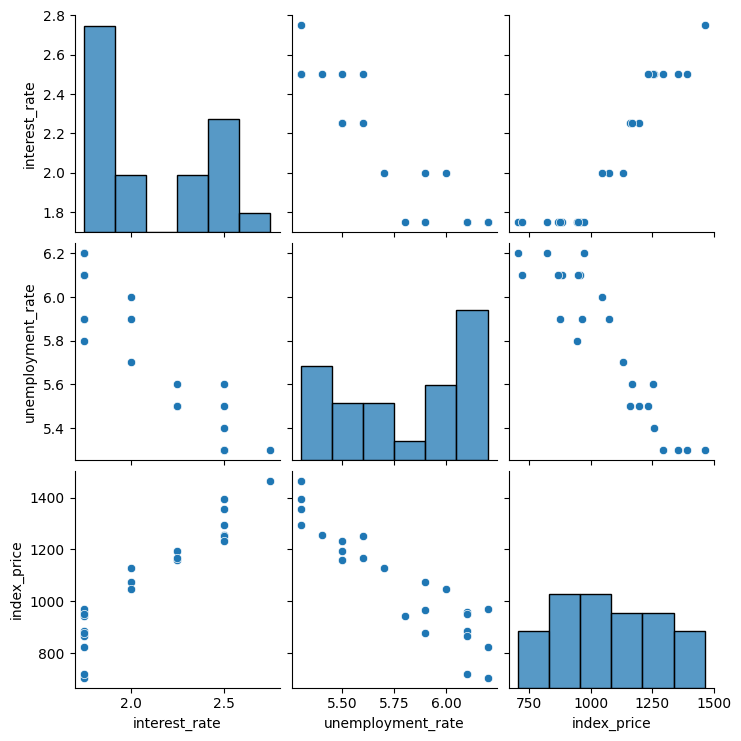

In [15]:
sns.pairplot(df_index)

In [16]:
df_index.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


### Visualize the datapoints more closely

Text(0, 0.5, 'Unemployment Rate')

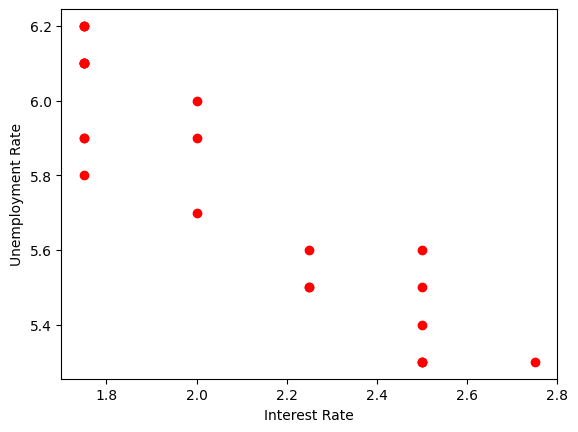

In [19]:
plt.scatter(df_index['interest_rate'], df_index['unemployment_rate'], color='r')
plt.xlabel("Interest Rate")
plt.ylabel("Unemployment Rate")

### Independent and Dependent Features

In [26]:
# X = df_index[['interest_rate', 'unemployment_rate']]
# we can also do like
X = df_index.iloc[:,:-1] # remove last column rest select all
X.head()

,interest_rate,unemployment_rate
0,2.75,5.3
1,2.50,5.3
2,2.50,5.3
3,2.50,5.3
4,2.50,5.4


In [27]:
y = df_index.iloc[:,-1]
y

0     1464
1     1394
2     1357
3     1293
4     1256
5     1254
6     1234
7     1195
8     1159
9     1167
10    1130
11    1075
12    1047
13     965
14     943
15     958
16     971
17     949
18     884
19     866
20     876
21     822
22     704
23     719
Name: index_price, dtype: int64

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

### Regression Plot

<Axes: xlabel='interest_rate', ylabel='index_price'>

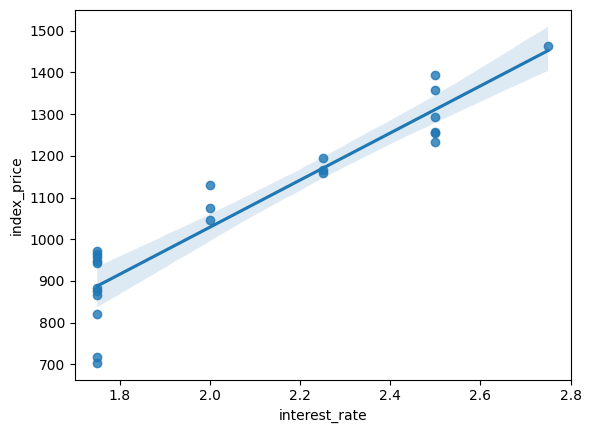

In [34]:
sns.regplot(x = df_index['interest_rate'], y = df_index['index_price']) #Plot data and a linear regression model fit.

<Axes: xlabel='interest_rate', ylabel='unemployment_rate'>

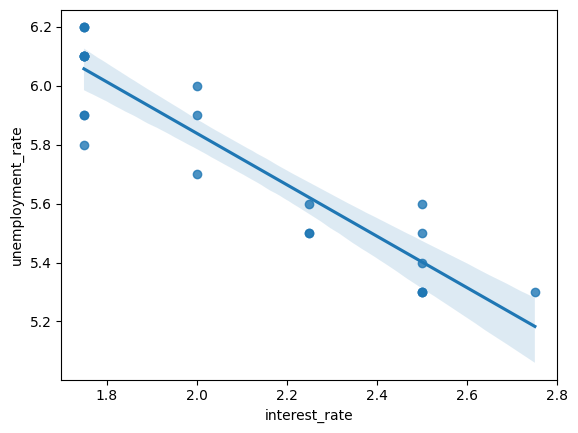

In [36]:
sns.regplot(x = df_index['interest_rate'], y = df_index['unemployment_rate'])

<Axes: xlabel='unemployment_rate', ylabel='index_price'>

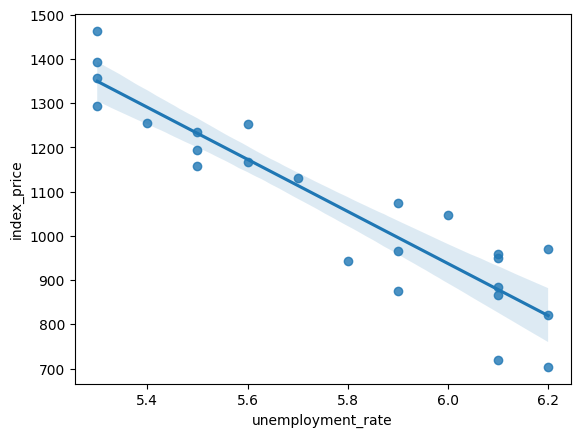

In [38]:
sns.regplot(x = df_index['unemployment_rate'], y = df_index['index_price']) #Plot data and a linear regression model fit.

### Standardize

In [40]:
from sklearn.preprocessing import StandardScaler

In [42]:
scaler = StandardScaler()

In [43]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [45]:
from sklearn.linear_model import LinearRegression

regression = LinearRegression()

In [46]:
regression.fit(X_train, y_train)               

LinearRegression()

### Cross Validation

In [48]:
from sklearn.model_selection import cross_val_score

#### cross_val_score

#### Parameters:
- **estimator**: This refers to the model being used.
- **X and y**: These represent the features (X) and target labels (y) in your dataset.
- **scoring**: This parameter specifies the scoring method for evaluating the performance of the model. For more information, search for the `scoring` parameter in `sklearn`.
- **cv**: Cross-validation parameter that divides the data into train and test sets. 

    - For example, if you have 1000 records and you split them into 900 for training and 100 for testing, you will only use the training data for model optimization and hyperparameter tuning.
    - You then split the training data into further subgroups for validation. If you set `cv=5`, you will split the 900 training records into 5 subsets (each containing 180 {900/5} records). 

##### Cross Validation Process:
1. In each experiment, one of the 5 subsets (size 180) will act as the test set, while the remaining 4 subsets (rest data) will be used as the training set.
2. For `cv=5`, you will conduct 5 experiments. Each experiment will give you a model score (e.g., Mean Squared Error).
3. If you select `neg_mean_squared_error` as the scoring method, the returned values will be negative.
4. After running the 5 experiments, you will have 5 different MSE (mean squared error) values.
5. You can calculate the average of these values to get an overall performance estimate.

In [49]:
validation_score = cross_val_score(regression, X_train, y_train,
                                   scoring='neg_mean_squared_error',
                                   cv=3)

In [50]:
validation_score

array([-4921.61331265, -7686.87497294, -5135.9962549 ])

In [51]:
np.mean(validation_score)

np.float64(-5914.828180162386)

### Prediction

In [53]:
y_pred = regression.predict(X_test)

In [54]:
y_pred

array([1204.22770398,  821.65051903, 1406.51300368,  857.70889608,
        994.90992298, 1168.16932693])

### Performance metrics

In [55]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

5793.762887712569
59.935781523235484
76.11677139574805


In [57]:
from sklearn.metrics import r2_score
score = r2_score(y_test, y_pred)
print(score)

# adjusted R square
print(1 - (1-score) * (len(y_test)-1)/(len(y_test) - X_test.shape[1]-1))

0.8278978091457145
0.7131630152428576


### Assumptions

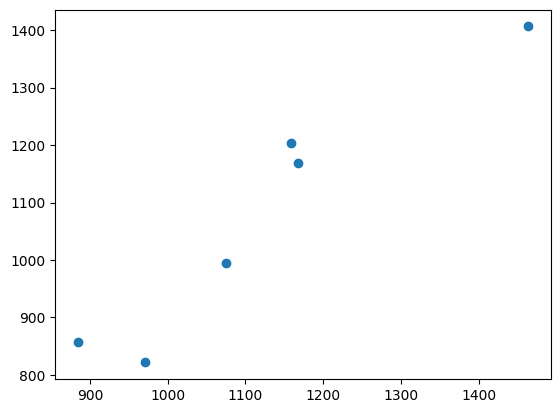

In [59]:
plt.scatter(y_test, y_pred) # if there is linear relationship that means model has performed well

In [60]:
residuals = y_test - y_pred
print(residuals) # ERRORS

8     -45.227704
16    149.349481
0      57.486996
18     26.291104
11     80.090077
9      -1.169327
Name: index_price, dtype: float64


### Plot residuals

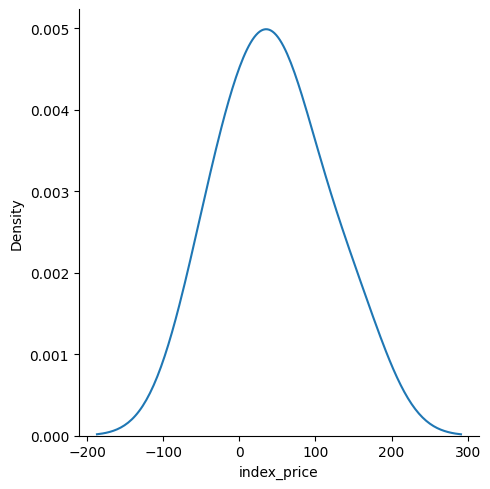

In [62]:
sns.displot(residuals, kind='kde') # normal distribution => model is good

### scatter plot wrt prediction and residuals

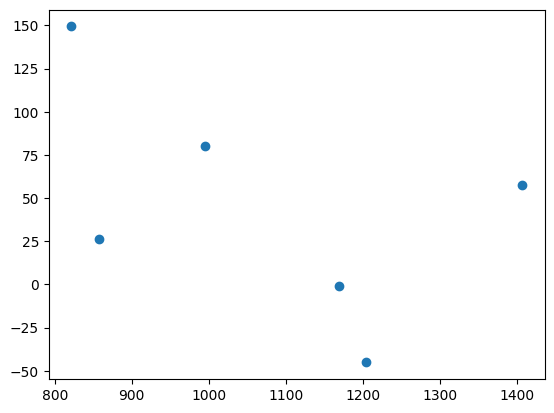

In [63]:
plt.scatter(y_pred, residuals)

### OLS Linear Regression

In [64]:
import statsmodels.api as sm

In [65]:
model = sm.OLS(y_train, X_train).fit()

In [67]:
model.summary()

C:\Users\gurunaml\OneDrive - Firstsource Solutions Ltd\Desktop\ML\ML\Lib\site-packages\scipy\stats\_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=18 observations were given.
  return hypotest_fun_in(*args, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            index_price   R-squared (uncentered):                   0.035
Model:                            OLS   Adj. R-squared (uncentered):             -0.086
Method:                 Least Squares   F-statistic:                             0.2880
Date:                Sun, 09 Feb 2025   Prob (F-statistic):                       0.754
Time:                        21:42:45   Log-Likelihood:                         -150.85
No. Observations:                  18   AIC:                                      305.7
Df Residuals:                      16   BIC:                                      307.5
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            88.2728    658.295      0.134      0.895   -1307.250    1483.796
x2          -116.2572    658.295     -0.177      0.862   -1511.780    1279.266
==============================================================================
Omnibus:                        0.598   Durbin-Watson:                   0.007
Prob(Omnibus):                  0.741   Jarque-Bera (JB):                0.567
Skew:                          -0.361   Prob(JB):                        0.753
Kurtosis:                       2.517   Cond. No.                         4.78
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [68]:
print(regression.coef_)

[  88.27275507 -116.25716066]
